In [1]:
import os
import pandas as pd
import tensorflow as tf
import subprocess
import pickle
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from train import train_lnphi


In [2]:
'''
# P range [10,30], T range [620, 650], x_nC4 range [0,1]
See data_gen_from_PTx.py
'''

# Load and prepare training data
LNPHI_PATH = r"E:\Datasets"
datafile_name = r"nC4_data_nC4-nC10_PTx_range_20200821-194011.csv" #nC4_data_nC4-nC10_PTx_range_20200821-194011.csv
# nC10_data_nC4-nC10_PTx_range_20200822-113453.csv
log_save_dir = r"C:\Users\win7\Desktop\logs"

tr = train_lnphi()
tr.load_lnphi_data(LNPHI_PATH, datafile_name)
#tr.lnphi_range(-10, 10)
tr.split_data()
tr.feature_eng()

Loading done. Shape: (1000000, 5)
Splitting done.
Feature Eng done.


In [3]:
list(tr.X_train)

['a_mix', 'b_mix', 'b_i', 'sum']

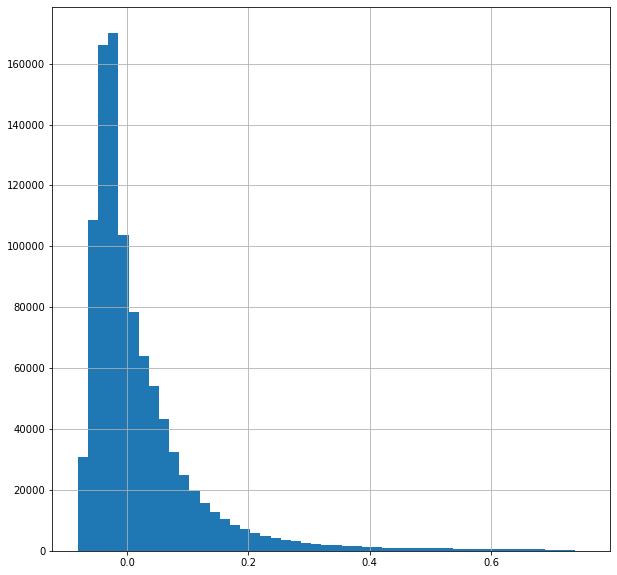

In [25]:
tr.lnphi['lnphi'].hist(bins=50, figsize=(10,10))
plt.show()

In [26]:
tr.lnphi['lnphi'].describe()

count    1000000.000000
mean           0.020944
std            0.098241
min           -0.081218
25%           -0.036012
50%           -0.011056
75%            0.044271
max            0.755310
Name: lnphi, dtype: float64

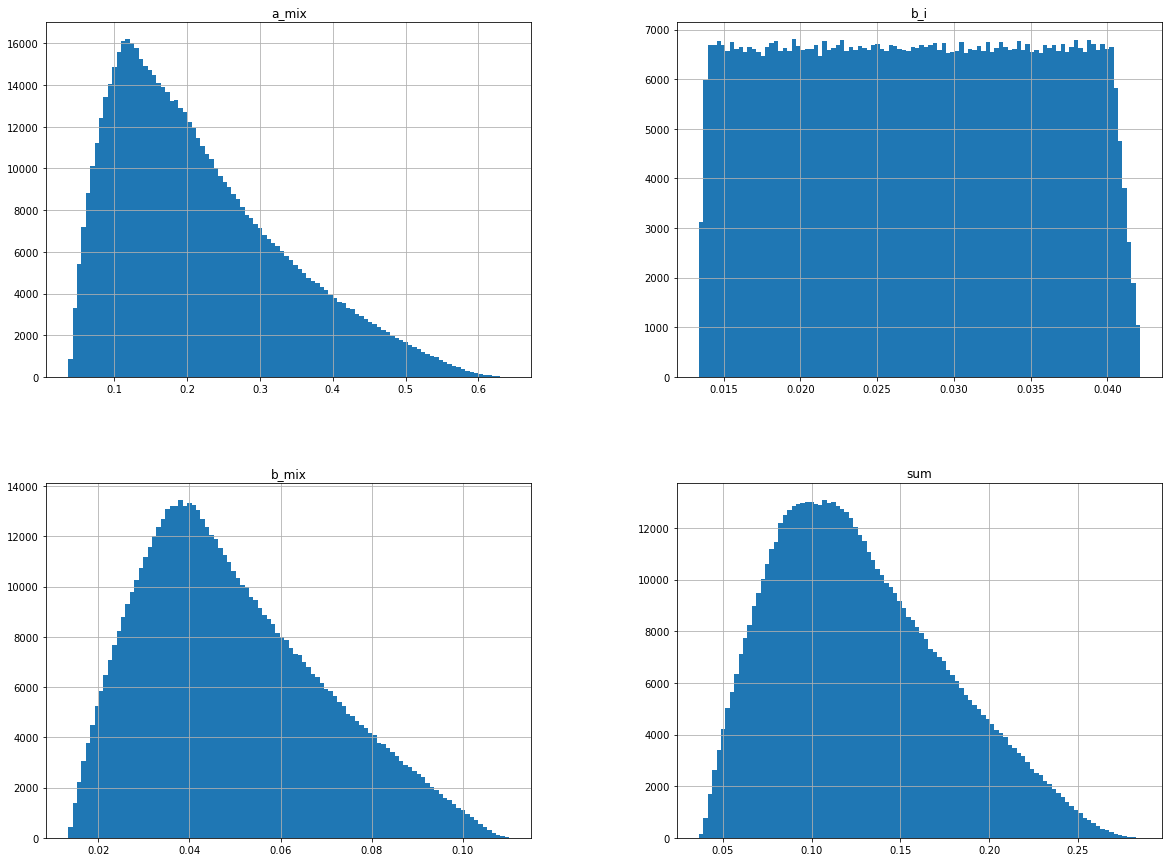

In [27]:
# Note: Histogram may have empty bins. This is an effect of bin resolution, and does not necessarily mean
# the distribution has a gap.
import matplotlib.pyplot as plt
d = pd.DataFrame(tr.X_train, columns=list(tr.X_train))
d.hist(bins=100, figsize=(20,15))
plt.show()

In [7]:
d.describe()

,a_mix,b_mix,b_i,sum
count,640000.000000,640000.000000,640000.000000,640000.000000
mean,0.218133,0.049581,0.071741,0.287591
std,0.116979,0.019770,0.020947,0.108279
min,0.036632,0.013394,0.035034,0.082320
25%,0.125347,0.034352,0.053620,0.203227
50%,0.193214,0.046358,0.071721,0.272431
75%,0.289873,0.062763,0.089842,0.360185
max,0.642410,0.110188,0.110188,0.642410


In [ ]:
import matplotlib.pyplot as plt
d2 = pd.DataFrame(tr.X_train_prepared, columns=list(tr.X_train))
d2.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
'''d2.describe()'''

In [ ]:

d3 = pd.DataFrame(tr.y_train_prepared)
d3.hist(bins=500, figsize=(20,15))
plt.show()

In [ ]:
d3.describe()

In [ ]:
'''# Load model
tr.model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642\norm_all_4096_3_40_250_20200810-195701')
# Give existing log directory
tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642'
tr.model.summary()'''


In [8]:
# Train
name_prefix = 'lnphi_nC10_T620-650_P10-30'
batch_size = 512
n_layers = 4
n_nodes = 20
epochs = 300
initial_epoch = 199 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
#tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\Liquid_Root__512_3_40_50_20200820-135819'
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 640000 samples, validate on 160000 samples
Epoch 200/300

Epoch 00200: mse improved from inf to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC10_T620-650_P10-30_100_4_20_100_20200826-174143
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC10_T620-650_P10-30_100_4_20_100_20200826-174143\assets
640000/640000 - 4s - loss: 2.2715e-07 - mse: 2.2715e-07 - mae: 3.4871e-04 - mean_absolute_percentage_error: 6.6224 - val_loss: 1.1830e-07 - val_mse: 1.1830e-07 - val_mae: 3.0515e-04 - val_mean_absolute_percentage_error: 0.0525
Epoch 201/300

Epoch 00201: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.3392e-07 - mse: 2.3392e-07 - mae: 3.4765e-04 - mean_absolute_percentage_error: 4.6484 - val_loss: 6.5906e-08 - val_mse: 6.5906e-08 - val_mae: 2.0787e-04 - val_mean_absolute_percentage_error: 0.0461
Epoch 202/300

Epoch 00202: mse did not improve from 0.00000
640000/640000 - 3s - loss: 2.5816e-07 - mse: 2.5816e-07 - 

Epoch 226/300

Epoch 00226: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.4798e-07 - mse: 2.4798e-07 - mae: 3.3512e-04 - mean_absolute_percentage_error: 7.9950 - val_loss: 2.1554e-08 - val_mse: 2.1554e-08 - val_mae: 9.9420e-05 - val_mean_absolute_percentage_error: 0.0251
Epoch 227/300

Epoch 00227: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.5565e-07 - mse: 2.5565e-07 - mae: 3.5247e-04 - mean_absolute_percentage_error: 8.9332 - val_loss: 5.2877e-08 - val_mse: 5.2877e-08 - val_mae: 1.7927e-04 - val_mean_absolute_percentage_error: 0.0424
Epoch 228/300

Epoch 00228: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.1754e-07 - mse: 2.1754e-07 - mae: 3.3340e-04 - mean_absolute_percentage_error: 9.9404 - val_loss: 7.9932e-07 - val_mse: 7.9932e-07 - val_mae: 8.7049e-04 - val_mean_absolute_percentage_error: 0.1664
Epoch 229/300

Epoch 00229: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.5335e-07 - mse: 2.5335e-07 - mae: 3.6242e-04 -

Epoch 255/300

Epoch 00255: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.3909e-07 - mse: 2.3909e-07 - mae: 3.5793e-04 - mean_absolute_percentage_error: 7.8770 - val_loss: 2.7612e-08 - val_mse: 2.7612e-08 - val_mae: 1.1311e-04 - val_mean_absolute_percentage_error: 0.0337
Epoch 256/300

Epoch 00256: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.6457e-07 - mse: 2.6457e-07 - mae: 3.6723e-04 - mean_absolute_percentage_error: 5.8798 - val_loss: 4.4366e-08 - val_mse: 4.4366e-08 - val_mae: 1.7399e-04 - val_mean_absolute_percentage_error: 0.0353
Epoch 257/300

Epoch 00257: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.1584e-07 - mse: 2.1584e-07 - mae: 3.2373e-04 - mean_absolute_percentage_error: 8.2413 - val_loss: 3.8953e-07 - val_mse: 3.8953e-07 - val_mae: 4.3333e-04 - val_mean_absolute_percentage_error: 0.1162
Epoch 258/300

Epoch 00258: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.2678e-07 - mse: 2.2678e-07 - mae: 3.5616e-04 -

Epoch 283/300

Epoch 00283: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.1982e-07 - mse: 2.1982e-07 - mae: 3.3612e-04 - mean_absolute_percentage_error: 5.7712 - val_loss: 1.8272e-07 - val_mse: 1.8272e-07 - val_mae: 3.9979e-04 - val_mean_absolute_percentage_error: 0.0735
Epoch 284/300

Epoch 00284: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.5377e-07 - mse: 2.5377e-07 - mae: 3.5275e-04 - mean_absolute_percentage_error: 8.7231 - val_loss: 1.8577e-08 - val_mse: 1.8577e-08 - val_mae: 9.6146e-05 - val_mean_absolute_percentage_error: 0.0240
Epoch 285/300

Epoch 00285: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.1253e-07 - mse: 2.1253e-07 - mae: 3.2055e-04 - mean_absolute_percentage_error: 10.2572 - val_loss: 2.6207e-07 - val_mse: 2.6207e-07 - val_mae: 4.6864e-04 - val_mean_absolute_percentage_error: 0.0980
Epoch 286/300

Epoch 00286: mse did not improve from 0.00000
640000/640000 - 2s - loss: 2.3312e-07 - mse: 2.3312e-07 - mae: 3.1960e-04 

In [ ]:
tr.logdir